In [141]:
import uilc
import numpy as np
import math
import matplotlib.pyplot as plt

In [179]:
s = 30
W = 0.09
H = 0.03

In [180]:
ds_rho, ds_position, ds_F = uilc.disop.solve_system(s, W, H)
ds_rho = (ds_rho.shape[0]/(W*ds_rho.sum())) * ds_rho


In [181]:
nnls_n = 1000
nnls_rho1, nnls_position1, nnls_F = uilc.disop.solve_system(s, W, H, n_nnls = nnls_n, method="nnls")
nnls_rho1 = (nnls_rho1.shape[0]/(W*nnls_rho1.sum())) * nnls_rho1
nnls_n = 500
nnls_rho2, nnls_position2, nnls_F = uilc.disop.solve_system(s, W, H, n_nnls = nnls_n, method="nnls")
nnls_rho2 = (nnls_rho2.shape[0]/(W*nnls_rho2.sum())) * nnls_rho2
nnls_n = 200
nnls_rho3, nnls_position3, nnls_F3 = uilc.disop.solve_system(s, W, H, n_nnls = nnls_n, method="nnls")
nnls_rho3 = (nnls_rho3.shape[0]/(W*nnls_rho3.sum())) * nnls_rho3


In [182]:
nnls_n = 1500
nnls_rho8, nnls_position8, nnls_F = uilc.disop.solve_system(s, W, H, n_nnls = nnls_n, method="nnls")
nnls_rho8 = (nnls_rho8.shape[0]/(W*nnls_rho8.sum())) * nnls_rho8

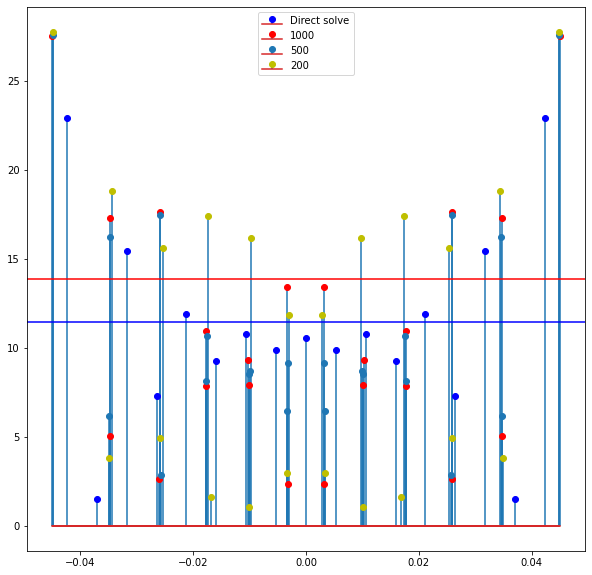

In [184]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

marker1, stemlines1, baseline1 = ax.stem(ds_position, ds_rho, label="Direct solve")
marker2, stemlines2, baseline2 = ax.stem(nnls_position1, nnls_rho1, label="1000")
marker3, stemlines3, baseline3 = ax.stem(nnls_position2, nnls_rho2, label="500")
marker4, stemlines4, baseline4 = ax.stem(nnls_position3, nnls_rho3, label="200")
#ax.plot(nnls_position3, nnls_F3.dot(rho))
#marker8, stemlines8, baseline4 = ax.stem(nnls_position8, nnls_rho8, label="{}".format(nnls_n))

marker1.set_color("b")
marker2.set_color("r")
#marker3.set_color("c")
marker4.set_color("y")
plt.axhline(y= nnls_rho3[0]/2, color="red")
plt.axhline(y= ds_rho[0]/2, color="blue")
plt.legend()
plt.show()

In [172]:
nnls_position3

array([-0.014925, -0.004725, -0.004575,  0.004575,  0.004725,  0.014925])

In [164]:
nnls_rho3

array([32.07122857, 25.91553542, 20.4161425 ,  2.29359372, 14.80633904,
        4.49716076,  4.49716076, 14.80633904,  2.29359372, 20.4161425 ,
       25.91553542, 32.07122857])

In [158]:
[51.83107084, 40.83228499 +.58718744, 29.61267808 +8.99432151]

[51.83107084, 41.41947243, 38.60699959]

In [166]:
[25.91553542, 20.4161425 +  2.29359372, 14.80633904 +4.49716076]

[25.91553542, 22.70973622, 19.303499799999997]

In [138]:
dm = 0.0034
x = np.array([-0.02985-dm, -0.02985+dm , -0.01965, -0.01125, -0.00375, 0.00375, 0.01125, 0.01965, 0.02985-dm, 0.02985+dm])
arr = uilc.utils.get_2d_array(np.array([0]), x , dim =0)

In [139]:
# Plot value
xline = np.linspace(-W/2, W/2 , 400)
yline = np.linspace(-W/2, W/2 , 400)
X, Y = np.meshgrid(xline, yline)

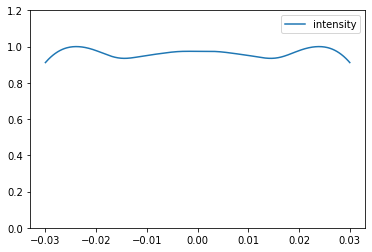

In [140]:
intensity = uilc.utils.lambertian_distribution(xline, np.array([[[0]]]), arr, s, H)
bc_y = intensity[0][0]
bc_y = bc_y/bc_y.max()
plt.plot(xline, bc_y, label="intensity")
plt.ylim(0, 1.2)
plt.legend()
plt.show()

In [95]:
arr

array([[[ 0.02985,  0.     ],
        [ 0.01965,  0.     ],
        [ 0.01125,  0.     ],
        [ 0.00375,  0.     ],
        [-0.00375,  0.     ],
        [-0.01125,  0.     ],
        [-0.01965,  0.     ],
        [-0.02985,  0.     ]]])

In [78]:
j = [2, 4, 6]
n = rho.size

for l in j:
    rho[l] = rho[n-1-l] = 0


In [48]:
rho.size-6-1

7

In [79]:
ar = [18.0306145 + 10.44938305,
16.72668919+  8.11677247,
12.50188333+ 10.45302511]

In [80]:
i= [1, 3, 5]
for k, l in enumerate(i):
    print(n)
    print(l)
    rho[l] = ar[k]
    rho[n-1-l] = ar[k]

14
1
14
3
14
5


In [11]:
ar

[28.47999755, 24.84346166, 22.95490844]

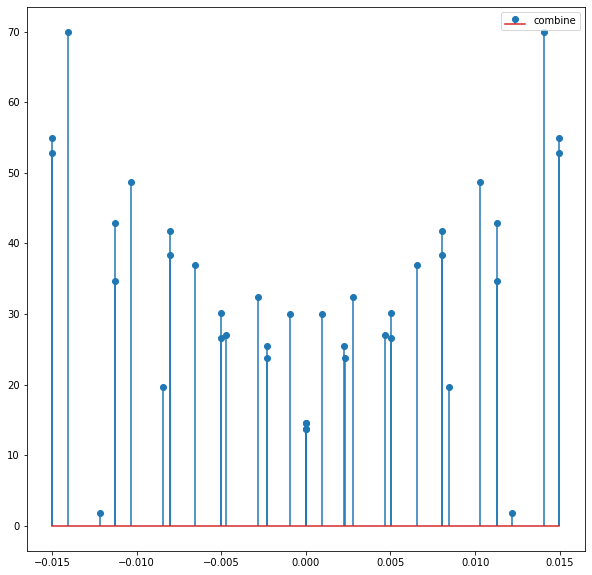

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

pos = np.concatenate((ds_position, nnls_position1, nnls_position8))
y = np.concatenate((ds_rho, nnls_rho1,nnls_rho8))
#ax.plot(ds_position, ds_rho, label="Direct solve")
ax.stem(pos, y, label="combine")

plt.legend()
plt.show()

In [20]:
np.concatenate((ds_rho, nnls_rho1,nnls_rho8))

array([69.94516623,  1.82114951, 48.74746596, 19.7336525 , 36.92834229,
       27.0483871 , 32.38708388, 30.05541921, 30.05541921, 32.38708388,
       27.0483871 , 36.92834229, 19.7336525 , 48.74746596,  1.82114951,
       69.94516623, 54.99217523, 34.66584443, 41.79810161, 30.17159045,
       23.84320489, 14.52908333, 14.52908359, 23.84320473, 30.17159049,
       41.79810161, 34.66584443, 54.99217523, 52.75415285, 42.89569151,
       38.37952541, 26.63810771, 25.53491222, 13.79761033, 13.7976102 ,
       25.53491231, 26.63810769, 38.37952541, 42.89569151, 52.75415285])